In [61]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [ ]:
# download the data from here: https://crcns.org/data-sets/bst/vta-1/about-vta-1 and copy the data folder here
n_cell = 42
all_data = []
for cell in range(n_cell):
    all_data.append(loadmat('datasets/Uchida/Saline_Task1_%d.mat' % (cell + 1)))

In [52]:
trial_nums = []
for d in all_data:
    trial_nums.append(d['trial_type'].shape[0])
set(trial_nums)

{150, 166, 168, 181, 186, 191, 194, 197, 198, 199, 208, 212, 220, 228, 229}

In [92]:
len(np.where(all_data[0]['trial_type'][:, 0] == 10)[0])

25

(0.0, 553.0)

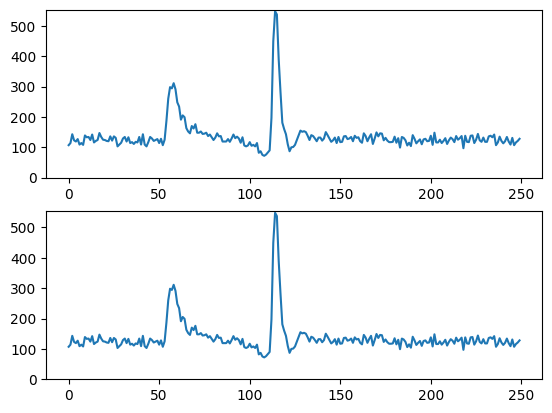

In [123]:
def add_trial_to_spike_counts(anchor_ms, window_ms, bin_ms, spike_times, spike_counts):
     
    trial_start_ms = anchor_ms + window_ms[0]
    trial_end_ms = anchor_ms + window_ms[1]

    for ts in spike_times:
        if ts >= trial_start_ms and ts < trial_end_ms:
            spike_time_from_trial_start_ms = ts - trial_start_ms
            bin_idx = int(np.floor(spike_time_from_trial_start_ms / bin_ms))
            spike_counts[bin_idx] += 1
        elif ts >= trial_end_ms:
            break


window_ms = (-1000, 4000)
bin_ms = 20
window_length_ms = window_ms[1] - window_ms[0]
assert(window_length_ms % bin_ms == 0)
n_bin = int(window_length_ms / bin_ms)

naive_spike_counts = np.zeros((n_bin))
learned_spike_counts = np.zeros((n_bin))


n_cell = 41
task_ID = 2
all_data = []
for cell in range(n_cell):
    all_data.append(loadmat('data/Saline_Task%d_%d.mat' % (task_ID, cell + 1)))

for cell in all_data:
    #-1-9 correspond to Odor A Trials, with ISIs of 1.2s (1) to 2.8s (9).
    #-10 and 11 correspond to Odor B and Odor C trials, respectively
    #-16 corresponds to Odor D trials
    #-13 corresponds to Odor A omission trials
    #-14 corresponds to Odor B omission trials
    #-15 corresponds to Odor C omission trials
    trial_B_indices = np.where(cell['trial_type'][:, 0] == 10)[0]
    #print(trial_B_indices)
    n_trials_B = len(trial_B_indices)
    if n_trials_B == 0:
        continue

    for tr_idx in range(0, n_trials_B):
        act_naive_trial = trial_B_indices[tr_idx]
        naive_t_cs = cell['odor_onsets'][act_naive_trial,0]
        add_trial_to_spike_counts(anchor_ms=naive_t_cs, window_ms=window_ms, bin_ms=bin_ms, spike_times=cell['spiketimes'][:, 0], spike_counts=naive_spike_counts)

        act_learned_trial = trial_B_indices[-tr_idx-1]
        learned_t_cs = cell['odor_onsets'][act_learned_trial,0]
        add_trial_to_spike_counts(anchor_ms=learned_t_cs, window_ms=window_ms, bin_ms=bin_ms, spike_times=cell['spiketimes'][:, 0], spike_counts=learned_spike_counts)

        #print(act_naive_trial, act_learned_trial)

y_max = np.maximum(naive_spike_counts.max(), learned_spike_counts.max()) + 5
plt.subplot(2, 1, 1)
plt.plot(naive_spike_counts)
plt.ylim((0, y_max))
plt.subplot(2, 1, 2)
plt.plot(learned_spike_counts)
plt.ylim((0, y_max))



In [101]:
np.maximum(naive_spike_counts.max(), learned_spike_counts.max())

np.float64(40.0)